# Basic library

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

# Import dataset

In [2]:
car = pd.read_csv("car_data.csv")
car

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


# Data preprocessing

In [3]:
car.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [4]:
car.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [ ]:
## Drop user_ID as it has no relation with DV

In [5]:
car.drop(['User ID'],axis=1,inplace=True)

In [6]:
car

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0
...,...,...,...,...
995,Male,38,59000,0
996,Female,47,23500,0
997,Female,28,138500,1
998,Female,48,134000,1


In [7]:
car['Purchased'].unique()

array([0, 1], dtype=int64)

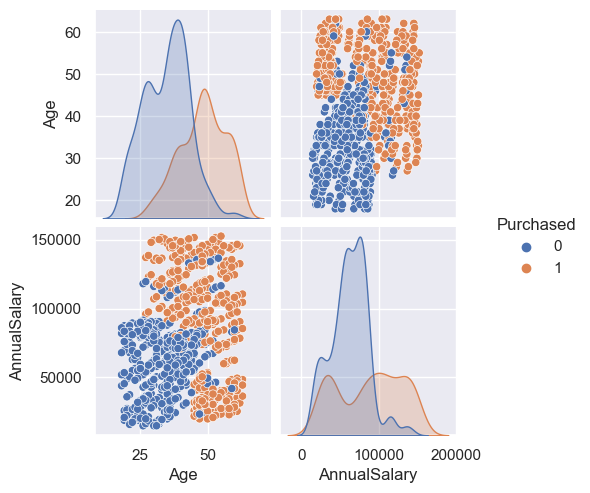

In [8]:
sns.pairplot(car,hue='Purchased')
plt.show()

In [9]:
car['Purchased'].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [ ]:
## Impliment encodeing for object variable 

In [10]:
car['Gender']=car['Gender'].astype('category')
car['Gender']=car['Gender'].cat.codes

In [ ]:
## Drop duplicate values

In [11]:
car.duplicated().sum()

57

In [12]:
car=car.drop_duplicates()

In [13]:
car

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


# Dividing the dataset into Iv and DV

In [14]:
x = car.iloc[:,0:-1]

In [15]:
x

,Gender,Age,AnnualSalary
0,1,35,20000
1,1,40,43500
2,1,49,74000
3,1,40,107500
4,1,25,79000
...,...,...,...
995,1,38,59000
996,0,47,23500
997,0,28,138500
998,0,48,134000


In [16]:
y = car['Purchased']

In [17]:
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 943, dtype: int64

# Split the data into traning and testing

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101,stratify=y)

# Impliment feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_fe = scaler.fit_transform(x_train)
x_test_fe = scaler.transform(x_test)

In [20]:
x_train.shape

(707, 3)

In [21]:
y_train.shape

(707,)

In [22]:
x_test.shape

(236, 3)

In [23]:
y_test.shape

(236,)

# Building the logistic regression model

In [24]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(multi_class='ovr')
logit.fit(x_train_fe,y_train)

LogisticRegression(multi_class='ovr')

In [25]:
y_pred_train = logit.predict(x_train_fe)
y_pred_test = logit.predict(x_test_fe)

# Evaluation with confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [27]:
print(confusion_matrix(y_train, y_pred_train))
print("**************"*10)
print(confusion_matrix(y_test, y_pred_test))

[[366  47]
 [ 78 216]]
********************************************************************************************************************************************
[[124  14]
 [ 29  69]]


In [28]:
print("Training Accuracy Score", accuracy_score(y_train, y_pred_train))
print("**************"*10)
print("Test Accuracy Score", accuracy_score(y_test, y_pred_test))

Training Accuracy Score 0.8231966053748232
********************************************************************************************************************************************
Test Accuracy Score 0.8177966101694916


In [29]:
print(classification_report(y_train, y_pred_train))
print("**************"*10)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       413
           1       0.82      0.73      0.78       294

    accuracy                           0.82       707
   macro avg       0.82      0.81      0.81       707
weighted avg       0.82      0.82      0.82       707

********************************************************************************************************************************************
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       138
           1       0.83      0.70      0.76        98

    accuracy                           0.82       236
   macro avg       0.82      0.80      0.81       236
weighted avg       0.82      0.82      0.81       236



# Cross validation score

In [31]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit, x_train_fe, y_train, cv=10)
print(accuracy)
print()
print(accuracy.mean())
print()
print(accuracy.max())

[0.84507042 0.76056338 0.84507042 0.85915493 0.91549296 0.83098592
 0.85915493 0.78571429 0.75714286 0.77142857]

0.8229778672032193

0.9154929577464789


# roc_auc curve

In [32]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.8013161786453712

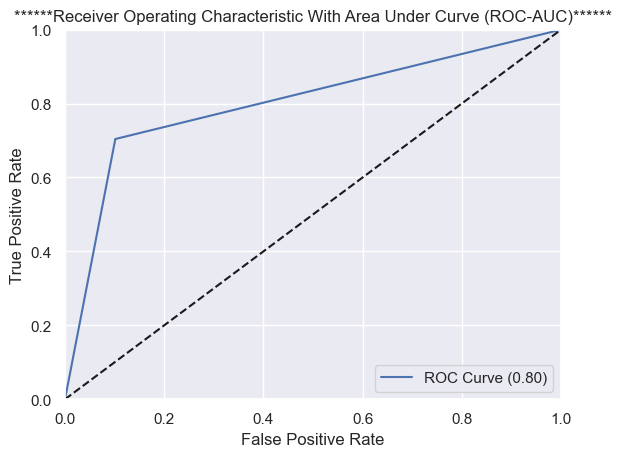

In [33]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (%0.2f)" % logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("******Receiver Operating Characteristic With Area Under Curve (ROC-AUC)******")
plt.legend(loc='lower right')
plt.show()